In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_data_complete = pd.merge( clinical_trial_df, mouse_drug_df, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_group = mouse_data_complete.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
mouse =pd.DataFrame(mouse_group).reset_index()
# Preview DataFrame
mouse.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
stderr_tumorVol_df = pd.DataFrame(mouse_data_complete.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].sem())
stderr_tumorVol_df = stderr_tumorVol_df.reset_index()
stderr_tumorVol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [32]:
# Minor Data Munging to Re-Format the Data Frames
stderr_tumorvol_pivot = stderr_tumorVol_df.pivot_table(index='Timepoint',columns='Drug' , values='Tumor Volume (mm3)', fill_value=0)
# Preview that Reformatting worked
stderr_tumorvol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumorvol_pivot = mouse.pivot_table(index = ["Timepoint"], values = "Tumor Volume (mm3)", columns = ["Drug"], fill_value = 0)
# Preview that Reformatting worked
mean_tumorvol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


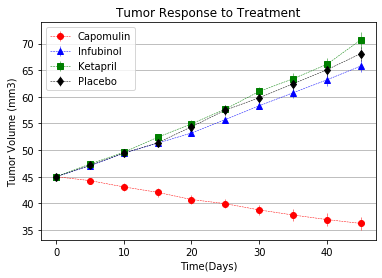

In [33]:
plt.errorbar(mean_tumorvol_pivot.index, mean_tumorvol_pivot['Capomulin'], yerr=stderr_tumorvol_pivot['Capomulin'],
             color='red',marker='o', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='red')
plt.errorbar(mean_tumorvol_pivot.index, mean_tumorvol_pivot['Infubinol'], yerr=stderr_tumorvol_pivot['Infubinol'],
             color='blue',marker='^', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='blue')
plt.errorbar(mean_tumorvol_pivot.index, mean_tumorvol_pivot['Ketapril'], yerr=stderr_tumorvol_pivot['Ketapril'],
             color='green',marker='s', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='green')
plt.errorbar(mean_tumorvol_pivot.index, mean_tumorvol_pivot['Placebo'], yerr=stderr_tumorvol_pivot['Placebo'],
             color='black',marker='d', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='black')

# Show y-axis in 'plain' format instead of 'scientific'
#plt.ticklabel_formatel_format(style='scientific', axis='y')

plt.title('Tumor Response to Treatment')
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo' ],
           loc='best')
#plt.tight_layout()
plt.grid(axis = "y")

# Save file
plt.savefig('Tritment.png')

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#mouse_group_Meta = mouse_data_complete.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
mean_tumorVol_df = pd.DataFrame(mouse_data_complete.groupby(["Drug","Timepoint"]).mean())["Metastatic Sites"]                                  
# Convert to DataFrame
mean_tumorVol_df = mean_tumorVol_df.reset_index()
# Preview DataFrame
mean_tumorVol_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [42]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumorVol_Pivot = mean_tumorVol_df.pivot_table(index='Timepoint',columns='Drug' , values='Metastatic Sites', fill_value=0)

# Preview that Reformatting worked
mean_tumorVol_Pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_tumorVol_df = pd.DataFrame(mouse_data_complete.groupby(["Drug","Timepoint"]).sem())["Metastatic Sites"]
# Convert to DataFrame
sem_tumorVol_df = sem_tumorVol_df.reset_index()
# Preview DataFrame
sem_tumorVol_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
sem_tumorvol_pivot = sem_tumorVol_df.pivot_table(index = ["Timepoint"], values = "Metastatic Sites", columns = ["Drug"], fill_value = 0)
# Preview that Reformatting worked
sem_tumorvol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


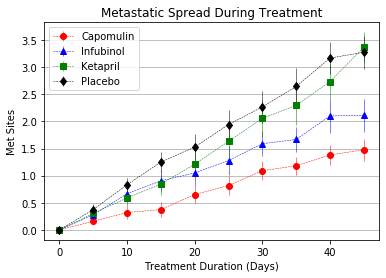

In [43]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumorVol_Pivot.index, mean_tumorVol_Pivot['Capomulin'], yerr=sem_tumorvol_pivot['Capomulin'],
             color='red',marker='o', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='red')
plt.errorbar(mean_tumorVol_Pivot.index, mean_tumorVol_Pivot['Infubinol'], yerr=sem_tumorvol_pivot['Infubinol'],
             color='blue',marker='^', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='blue')
plt.errorbar(mean_tumorVol_Pivot.index, mean_tumorVol_Pivot['Ketapril'], yerr=sem_tumorvol_pivot['Ketapril'],
             color='green',marker='s', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='green')
plt.errorbar(mean_tumorVol_Pivot.index, mean_tumorVol_Pivot['Placebo'], yerr=sem_tumorvol_pivot['Placebo'],
             color='black',marker='d', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='black')

# Show y-axis in 'plain' format instead of 'scientific'
#plt.ticklabel_formatel_format(style='scientific', axis='y')

plt.title('Metastatic Spread During Treatment')
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='best')
#plt.tight_layout()
plt.grid(axis = "y")

# Save the Figure
plt.savefig('Spread.png')

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_tumorVol_df = pd.DataFrame(mouse_data_complete.groupby(["Drug","Timepoint"]).count())["Mouse ID"]
# Convert to DataFrame
count_tumorVol_df = count_tumorVol_df.reset_index()
count_tumorVol_df = count_tumorVol_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
count_tumorVol_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
count_tumorvol_pivot = count_tumorVol_df.pivot_table(index = ["Timepoint"], values = "Mouse Count", columns = ["Drug"], fill_value = 0)
# Preview that Reformatting worked
count_tumorvol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


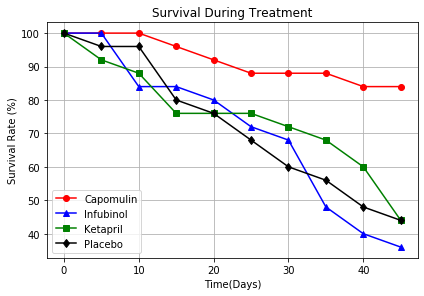

In [47]:
capomulin, = plt.plot(count_tumorvol_pivot.index, count_tumorvol_pivot["Capomulin"]*4, color="red",marker= "o", label="Capomulin")
Infubinol, = plt.plot(count_tumorvol_pivot.index, count_tumorvol_pivot["Infubinol"]*4, color="blue",marker= "^", label="Infubinol")
Ketapril, = plt.plot(count_tumorvol_pivot.index, count_tumorvol_pivot["Ketapril"]*4, color="green",marker= "s", label="Ketapril")
Placebo, = plt.plot(count_tumorvol_pivot.index, count_tumorvol_pivot["Placebo"]*4, color="black",marker= "d", label="Placebo")
# Show y-axis in 'plain' format instead of 'scientific'
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.title("Survival During Treatment")
plt.savefig("Survival.png")

## Summary Bar Graph

In [27]:
# Calculate the percent changes for each drug
percent_change_df = 100*(mean_tumorvol_pivot.iloc[-1] - mean_tumorvol_pivot.iloc[0])/mean_tumorvol_pivot.loc[0]
# Display the data to confirm
percent_change_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [35]:
percent_ch_s = (percent_change_df["Capomulin"], percent_change_df["Infubinol"], percent_change_df["Ketapril"], percent_change_df["Placebo"])
percent_ch_s

(-19.47530266789416, 46.123471727851836, 57.02879468660604, 51.29796048315153)

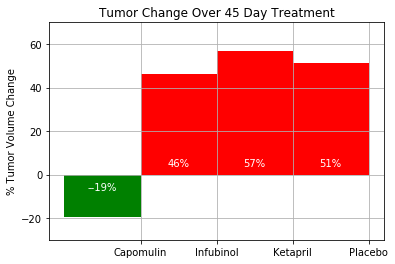

In [60]:
fig, ax = plt.subplots()
x_axis = np.arange(len(percent_ch_s))
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(x_axis + .5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_ylim([-30, 70])
ax.grid()
def autolabelFail(rects): 
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
               "%d%%" % int(height),
               ha="center", va="bottom", color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               "-%d%%" % int(height),
               ha="center", va="bottom", color="white")
autolabelPass(ax.bar(ind[0], percent_ch_s[0], width=1, color="g"))
autolabelFail(ax.bar(ind[1:], percent_ch_s[1:], width=1, color="red"))
fig.savefig("Change.png")
fig.show()